# 🚢 **Experiment No. 02: Titanic Survival Prediction** 🎯

**Author-** *Prashant Kumar*

**Class-** *T.Y.B.Tech (CSE)*

**Roll No.-** *B34*

---
## 📌 **Objective**
To build a **training and testing dataset** using the Titanic dataset to predict the probability of survival of a person based on **Gender, Age, and Passenger Class**.

---

## 📥 **Step 1: Import Required Libraries** 📚



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Display plots inline
%matplotlib inline


## 📂 **Step 2: Load the Dataset 📊**

In [2]:
# Load training and test datasets
training_set = pd.read_csv("C:/Users/prash/Desktop/Data Analytics & Visualization/train.csv")
test_set = pd.read_csv("C:/Users/prash/Desktop/Data Analytics & Visualization/test.csv")

# Display first few rows
training_set.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🔍 **Step 3: Data Cleaning & Feature Engineering**

***🏠 Convert Cabin to Deck***

In [3]:
# Define possible decks
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']

# Function to extract deck from cabin
def search_substring(big_string, substring_list):
    for substring in substring_list:
        if substring in big_string:
            return substring
    return substring_list[-1]

# Apply transformation
training_set['Deck'] = training_set['Cabin'].map(lambda x: search_substring(str(x), cabin_list))
test_set['Deck'] = test_set['Cabin'].map(lambda x: search_substring(str(x), cabin_list))

# Drop Cabin feature
training_set.drop('Cabin', axis=1, inplace=True)
test_set.drop('Cabin', axis=1, inplace=True)


***🆔 Extract Title from Name***

In [4]:
import re

# Function to extract title
def get_title(string):
    regex = re.compile(r'Mr|Don|Major|Capt|Jonkheer|Rev|Col|Dr|Mrs|Countess|Dona|Mme|Ms|Miss|Mlle|Master', re.IGNORECASE)
    results = regex.search(string)
    return results.group().lower() if results else "nan"

# Mapping titles to categories
title_dictionary = {
    "capt": "Officer", "col": "Officer", "major": "Officer", "dr": "Officer",
    "jonkheer": "Royalty", "rev": "Officer", "countess": "Royalty", "dona": "Royalty",
    "lady": "Royalty", "don": "Royalty", "mr": "Mr", "mme": "Mrs", "ms": "Mrs",
    "mrs": "Mrs", "miss": "Miss", "mlle": "Miss", "master": "Master", "nan": "Mr"
}

# Apply transformation
training_set['Title'] = training_set['Name'].apply(get_title).map(title_dictionary)
test_set['Title'] = test_set['Name'].apply(get_title).map(title_dictionary)

# Drop Name column
training_set.drop('Name', axis=1, inplace=True)
test_set.drop('Name', axis=1, inplace=True)


***🎟️ Drop Ticket Column***

In [5]:
training_set.drop('Ticket', axis=1, inplace=True)
test_set.drop('Ticket', axis=1, inplace=True)


## 📊 **Step 4: Handle Missing Values**

***👶 Fill Missing Age Values Based on Title***

In [6]:
# Calculate mean age for each title
means_title = training_set.groupby('Title')['Age'].mean()

# Function to replace NaN values with mean age based on title
def age_nan_replace(means, dframe, title_list):
    for title in title_list:
        temp = dframe['Title'] == title  # Extract indices
        dframe.loc[temp, 'Age'] = dframe.loc[temp, 'Age'].fillna(means[title])  # Replace NaN

# Apply transformation
title_list = ['Mr', 'Miss', 'Mrs', 'Master', 'Royalty', 'Officer']
age_nan_replace(means_title, training_set, title_list)
age_nan_replace(means_title, test_set, title_list)


***🚢 Fill Missing Embarked Values***

In [7]:
# Fill missing embarked values with 'S' (most common)
training_set['Embarked'].fillna('S', inplace=True)
test_set['Embarked'].fillna('S', inplace=True)


C:\Users\prash\AppData\Local\Temp\ipykernel_30140\2272086119.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  training_set['Embarked'].fillna('S', inplace=True)
C:\Users\prash\AppData\Local\Temp\ipykernel_30140\2272086119.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

***💰 Fill Missing Fare Values***

In [8]:
# Fill missing fare values with mean
test_set['Fare'].fillna(test_set['Fare'].mean(), inplace=True)


C:\Users\prash\AppData\Local\Temp\ipykernel_30140\4092916540.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_set['Fare'].fillna(test_set['Fare'].mean(), inplace=True)


## 📊 **Step 5: Data Visualization**

***📈 Survival Rate by Gender***

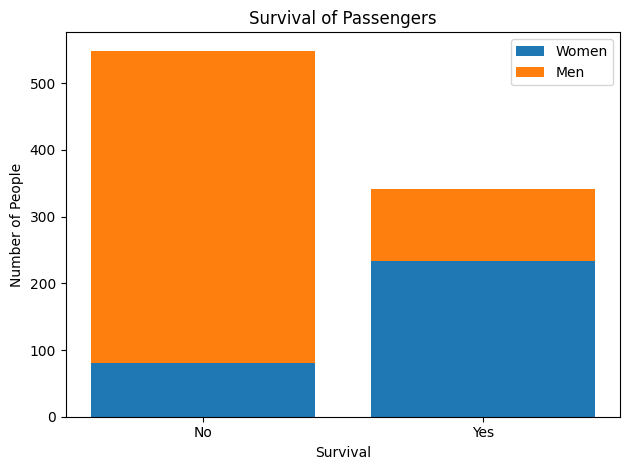

In [9]:
index = training_set['Survived'].unique()  # Get categories
grouped_data = training_set.groupby(['Survived', 'Sex'])
temp = grouped_data.size().unstack()

women_stats = (temp.iat[0,0], temp.iat[1,0])
men_stats = (temp.iat[0,1], temp.iat[1,1])

# Plot survival statistics
p1 = plt.bar(index, women_stats)
p2 = plt.bar(index, men_stats, bottom=women_stats)

plt.xticks(index, ('No', 'Yes'))
plt.ylabel('Number of People')
plt.xlabel('Survival')
plt.title('Survival of Passengers')
plt.legend((p1[0], p2[0]), ('Women', 'Men'))
plt.tight_layout()
plt.show()


## 🔢 **Step 6: Feature Engineering**

***👨‍👩‍👧‍👦 Create Family Size Feature***

In [10]:
# Create Family Size feature
training_set['Family Size'] = training_set['Parch'] + training_set['SibSp']
test_set['Family Size'] = test_set['Parch'] + test_set['SibSp']

# Drop Parch and SibSp columns
training_set.drop(['Parch', 'SibSp'], axis=1, inplace=True)
test_set.drop(['Parch', 'SibSp'], axis=1, inplace=True)


## ⚖️ **Step 7: Standardization & Encoding**

***🔄 Standardizing Age & Fare***

In [11]:
scaler = StandardScaler()
for column in ['Age', 'Fare']:
    training_set[column] = scaler.fit_transform(training_set[column].values.reshape(-1,1))
    test_set[column] = scaler.transform(test_set[column].values.reshape(-1,1))


***🎭 Encoding Categorical Features***

In [12]:
encoder = LabelEncoder()
categorical_features = ['Sex', 'Embarked', 'Deck', 'Title']

for feature in categorical_features:
    training_set[feature] = encoder.fit_transform(training_set[feature])
    test_set[feature] = encoder.transform(test_set[feature])


## 🎯 **Step 8: Prepare Dataset for Model Training**

In [13]:
# One-hot encode categorical features
training_set = pd.get_dummies(training_set, columns=['Embarked', 'Pclass', 'Title', 'Deck'])
test_set = pd.get_dummies(test_set, columns=['Embarked', 'Pclass', 'Title', 'Deck'])

# Align train and test sets
training_set, test_set = training_set.align(test_set, axis=1, fill_value=0)

# Extract features and target
y = training_set['Survived'].values
X = training_set.drop(['Survived', 'PassengerId'], axis=1).values
X_test = test_set.drop('PassengerId', axis=1).values


## 🏁 **Conclusion** 🎯

- We successfully cleaned and preprocessed the Titanic dataset.

- Important features like Gender, Age, Passenger Class, and Family Size were identified.

- Data was standardized, encoded, and made ready for machine learning models.

- This dataset is now prepared for classification models to predict survival. 🚀🔥